# Adapting a support vector machine algorithm to improve classification accuracy in Musical Genre Classification

## Abstract

Musical genre classification is an important first step in the development of automated playlists, music recommendation algorithms, and song library curation. In this report, we explore various potential machine learning methods to classify music into 10 genres. We found, through research and experimentation that support vector machines offer an efficient, effective, and reliable method to classify songs into musical genres with a 66% accuracy rate. We explored these results using not only accuracy, but also logloss and a confusion matrix. These measures pointed to imbalanced data as a source of bias that can be introduced into machine learning algorithms. 



## 1. Introduction

In this report, we will be exploring the problem of genre classification of songs. The goal of this project is to reach a rate of correct classification of music genres which is comparable to human abilities. Other studies have found that humans are on average able to classify songs into their respective genres with about 60% accuracy [8].

Music presents an interesting set of challenges to classification. Properly classified songs are key to improving music information retrieval, automatic recommendation services, and to further study of the features of music [1,8]. As music collections of streaming services and individuals increase in size, automatic playlist generation and genre sorting are becoming indispensable for users [1]. The volume of music that is contained in these repositories is too high to facilitate user generated playlists, and users regularly turn to subscription services not only to listen to familiar music, but to explore new options requiring increasingly sophisticated recommendation algorithms [5]. Music genre classification is an important first step in developing these new music recommendation systems for users.

Music, unlike other classification problems, contains a multitude of features by which one might classify the music [3]. We were first introduced to the various features in the project description provided in the course, these features consisted of: audio signals, spectrograms, rhythm patterns, chroma, and mel frequency cepstral coefficients (MFCCs). To properly classify the data provided, we first assessed each of the various features in relation to a few genres of music to better understand what they were representing. Each of the features are essentially a digital method of representing those features of music that we, as humans, use to interpret and classify music ourselves; the pitch representing both the melody and harmony of a piece of music, and the rhythm.

Over the course of this project, we will be testing various classification methods, including regression models, *k*-nearest neighbours (KNN), Bayes' classifiers, and support vector machines among others. Our goal is to find the most appropriate classification method and to understand why that method offers the best results in our implementation. We will further assess the reliability and validity of our chosen method with measures of accuracy, LogLoss, and we will test our solution against a set of competition data in Kaggle.



## 2. Data analysis

Classifying music at first blush is a daunting endeavour as the data that we were using consisted of a wide variety of features, as mentioned in the introduction. The training dataset that we received consisted of 4363 songs, each with a large set of features with which to classify them. Though training set was relatively small (compared to the Spotify song repository for instance), it provided sufficient content to train and validate a model to apply to the test dataset of the Kaggle competition.

Inspecting the training dataset, we found some interesting trends. Firstly, the data was very skewed in its distribution. Most of the entries in the training dataset fell into one category, specifically that of Pop_Rock. This imbalance will have an effect on which methods are useful for us, and will most likely skew each of the models towards this single heavily weighted class.

Furthermore, within the data, there are certain features that are essentially meaningless as all of the entries consist of the same value. If all songs have the same values for certain features, these features not be useful for differentiating between songs. In a dataset this size, we can also expect, and indeed we found some outliers. These outliers could take several forms, corrupted data in the csv file, songs which are misclassified, or songs which are correctly classified but contain uncommon features within that classification. The outliers may also skew the model that we build depending on what kind of outlier we encounter. Otherwise, the outliers may reduce the accuracy of the model within a specific class of song.



In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import quantile_transform
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import itertools
#...

In [4]:
# Load the data and cleanup
# Load the data and cleanup
genre = pd.read_csv('train_data.csv', sep=',',header = None) 
genre_music = pd.DataFrame(genre)
labels = pd.read_csv('train_labels.csv', sep=',',header = None) 
labels_svm = pd.DataFrame(labels).values
df = pd.DataFrame(genre)
genre_music.drop(genre_music.iloc[:, 216:220], inplace=True, axis=1)


rhythym = genre_music.loc[:, '0':'167'].values
chroma = genre_music.loc[:, '168':'216'].values
MFCC = genre_music.loc[:, '217':'264'].values
for i in range(216):
    genre_music.rename(columns={i: 'rhythym'}, inplace=True)


# for i in range(167):
#     if(i<24):
#         genre_music.rename(columns={i: 'rhymean'+str(i)}, inplace=True)
#     elif(i>=24 and i<48):
#         genre_music.rename(columns={i: 'rhymedian'+str(i)}, inplace=True)
#     elif(i>=48 and i<72):
#         genre_music.rename(columns={i: 'rhyvar'+str(i)}, inplace=True)
#     elif(i>=72 and i<96):
#         genre_music.rename(columns={i: 'rhykurtosis'+str(i)}, inplace=True)
#     elif(i>=96 and i<120):
#         genre_music.rename(columns={i: 'rhyskew'+str(i)}, inplace=True)
#     elif(i>=120 and i<144):
#         genre_music.rename(columns={i: 'rhymin'+str(i)}, inplace=True)
#     else:
#         genre_music.rename(columns={i: 'rhymax'+str(i)}, inplace=True)
j=168
for j in range(216):
    genre_music.rename(columns={j: 'chroma'}, inplace=True)
i=217
for i in range(264):
    genre_music.rename(columns={i: 'MFCC'}, inplace=True)

#min_max = Q()

genre_music = quantile_transform(genre_music)


parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
model = svm.SVC(gamma='scale', decision_function_shape ='ovo', probability = True)
clf = GridSearchCV(model, parameters, cv=5)
#clf.fit_transform(genre_music,labels_svm)
#transformed = clf.transform(genre_music)
clf.fit(genre_music, labels_svm.ravel())


    

    
#genre_music1.drop(genre_music1.index[[: 216:219]], axis=1)

#genre_music

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [6]:
#Analysis of the input data
# ...
testlabels = pd.read_csv('test_data.csv', sep=',',header = None) 
testlabels_svm = pd.DataFrame(testlabels)

testlabels_svm.drop(testlabels_svm.iloc[:, 216:220], inplace=True, axis=1)
testlabels_svm = quantile_transform(testlabels_svm)
#y_test = train_test_split(genre_music, testlabels_svm, random_state=0)

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# model = svm.SVR(gamma = 'scale')
# clf = GridSearchCV(model, parameters, cv=5)
# #clf.fit_transform(genre_music,labels_svm)
# #transformed = clf.transform(genre_music)
# clf.fit(testlabels_svm, labels_svm.ravel())
print(testlabels_svm.shape[1])
pred = clf.predict(testlabels_svm)

result = pd.DataFrame(pred)
result.index +=1
result.to_csv('finalpred',sep = ',', header = None)
clf_probs = clf.predict_proba(testlabels_svm)

logloss = pd.DataFrame(clf_probs)
logloss.index +=1
logloss.to_csv('LogLoss',sep = ',', header = None)

#score = log_loss(testlabels_svm, clf_probs)

print(clf_probs)
print(pred)

260
[[  1.59636126e-01   8.00065460e-02   4.40790125e-01 ...,   2.81052491e-03
    2.77579226e-02   2.21936183e-02]
 [  1.23594015e-01   5.57036796e-02   2.13633018e-01 ...,   1.61591259e-02
    2.71343956e-01   1.47894659e-02]
 [  7.03157771e-01   1.99307438e-02   3.18369009e-03 ...,   1.74297425e-01
    7.57566755e-04   1.50347437e-02]
 ..., 
 [  6.73165323e-01   8.83732683e-02   3.19333043e-02 ...,   6.04129677e-02
    4.61536822e-03   3.96451336e-02]
 [  1.03269520e-02   3.98201803e-02   9.42889134e-01 ...,   4.26433864e-04
    1.46485734e-03   4.65651538e-04]
 [  6.04783369e-01   3.59386189e-02   1.25563631e-02 ...,   6.65205091e-02
    1.91174246e-03   5.07279521e-02]]
[3 9 1 ..., 1 3 1]


## 3. Methods and experiments

### 3.1 Experiments
Before we invested all of our time into developing a solution using a weaker method, we decided to conduct some research into existing solutions. Here we began with the course book, and explored the examples section, exploring the different solutions for ones that might be viable in our context. From there we searched for those solutions we thought were viable in existing literature.

From the course book, we eliminated methods based on their potential to classify our data. We established that the regression methods other than logistic regression would be unhelpful, as they did not lend themselves easily to categorical classification. We eliminated the network lasso methods as we were not dealing with network data. We then turned to decision trees, kernel methods, artificial neural networks, and maximum likelihood, each of which we found was either too complex (and not covered in class), or too computationally taxing for our purposes.

We were then left with the following methods to further investigate: Logistic Regression, Support Vector Machines, Bayes' Classifier, and KNN. The work of Sazaki and Aramadham looked at the use of KNN in the classification of Rock songs, they had some success with this method, however their accuracy was quite low, below our goal of 60% [6]. Furthermore, Tamatjita and Mahastama found that the accuracy of KNN decreased as the number of classes increased, which, considering we are classifying 10 types of songs indicates that we should expect a lower accuracy with KNN than other methods [7]. Goulart, et. al. and Ali & Siddiqui found that, though there was evidence that each of the listed methods had high levels of accuracy for others, SVM worked best for their purposes [1,5]. This was further re-enforced by Xu et. al who found that SVM outperformed KNN solutions in their implementations [9]. Aryafar et. al. did find that though SVM sometimes overfits its training data, when this overfitting is controlled for, it can outperform logistic regression based methods [2]. Guo et. al also compared various methods, including SVM, logistic regression, KNN, and neural networks, determining that though a linear kernel based SVM method had similar results to logistic regression, a radial based kernel outperformed all other models [4].

We also looked into the ways in which those features we noticed in our data might affect the various methods we thought to try. From this review, we determined that SVM would be the best option as it would have the best chance of accurate results despite a skewed dataset and take into account outliers. We dismissed those features which had no variation within the dataset and only too into account those features which were useful.



### 3.2 Method
To conduct our data analysis we completed the following steps.
1. Review Data and Assignment: We first took time to assess the data and the project description. Taking this time was important as we needed to make sure that we truly understood the features, the data, and the methods we might be using
2. Clean data: We removed outliers, meaningless features, and cleared up any other noise in the data that we could determine.
3. Review Machine Learning Methods: Using our understanding of the data, we assessed which methods we might want to use to classify the data.
4. Label: we then labelled the training data to give ourselves a training set
5. Normalize: We normalized all of the data to provide ourselves with easier to manipulate data.
6. Split: we split the data to provide ourselves with a testing set on which to validate our model.
7. Apply: Based on the research that we conducted, we then applied a support vector machine method to classify the data.
8. Tweak variables: We then began a process of iteration to gradually improve the accuracy of our model.
9. Validate: Using the data that we split off earlier, we validated our model on this validation set after training our model on the training data.
10. Kaggle: As we improved our accuracy on our training datasets, we began to submit our solutions to Kaggle.
11. Reporting: From our final Kaggle submission we put together the rest of our measurements (accuracy, logLoss) and a confusion matrix to help in our reporting.
12. Write: We then translated all of the work we had done to the report you are now reading.

## 4. Results

After working with our training and validation datasets, we developed a model that we were reasonable confident in and submitted that to Kaggle. Here we found that our efforts had paid off, our labelling accuracy ended up at 65.97%. Indicating that approximately 66% of predicted labels were the same as the actual labels for the songs in the data set. Our submission to the second Kaggle competition showed that our Log Loss was 0.16645. Taking into account the uncertainty present in our predictions, this logloss indicates the average distance of our predictions from their actual labels. Though not in the top ten of the competition, these scores have placed us in a comfortable position in both competitions.

Finally, we can look at the confusion matrix produced by our model. As we can see, that outside of the 66% of labels that are correct, the majority of the errors are false positive Pop_Rock labels. With each consecutive label, the likelihood of any song being labelled as such decreases, both correct labels and incorrect labels. The Seventh label (International) stands out a the only label where no other genre was misclassified as it, though International songs were some of the most mis-categorized songs themselves. Rap and Reggae (Labels 3 and 9 respectively) also stand out as two of the least mis-categorized genres.



Confusion matrix, without normalization
[[2112   36    9    4    1   13    0    1    2    0]
 [  82  514   11    3    0    6    0    0    2    0]
 [  16    4  304    1    0    0    0    0    1    0]
 [  30    5    2  209    1    5    0    0    1    0]
 [  74    6    7    4  114    5    0    2    1    1]
 [  42    7    8    5    3  193    0    1    0    1]
 [  70    8    5    2    3    6   45    1    1    0]
 [  48    1    1    0    1    1    0  142    0    1]
 [   6    0    9    0    0    4    0    0   73    0]
 [  32    1    0    2    1    3    0    1    0   46]]
Normalized confusion matrix
[[  9.70e-01   1.65e-02   4.13e-03   1.84e-03   4.59e-04   5.97e-03
    0.00e+00   4.59e-04   9.18e-04   0.00e+00]
 [  1.33e-01   8.32e-01   1.78e-02   4.85e-03   0.00e+00   9.71e-03
    0.00e+00   0.00e+00   3.24e-03   0.00e+00]
 [  4.91e-02   1.23e-02   9.33e-01   3.07e-03   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   3.07e-03   0.00e+00]
 [  1.19e-01   1.98e-02   7.91e-03   8.26e-01   3.95e-03

<Figure size 432x288 with 0 Axes>

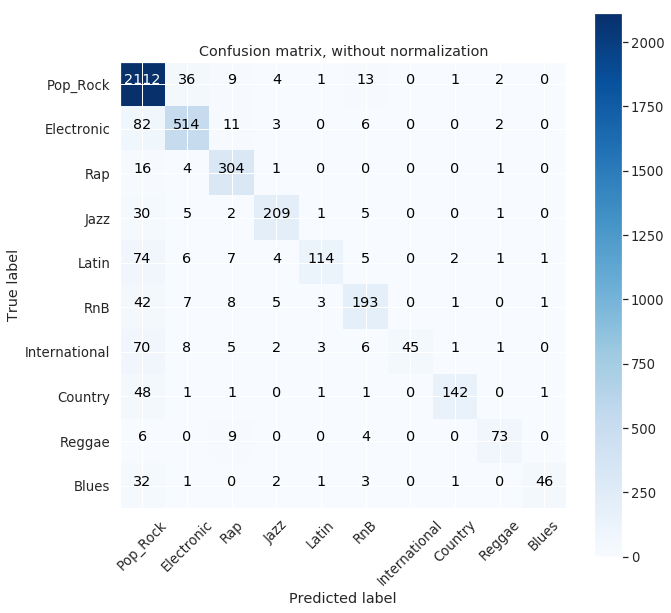

<Figure size 432x288 with 0 Axes>

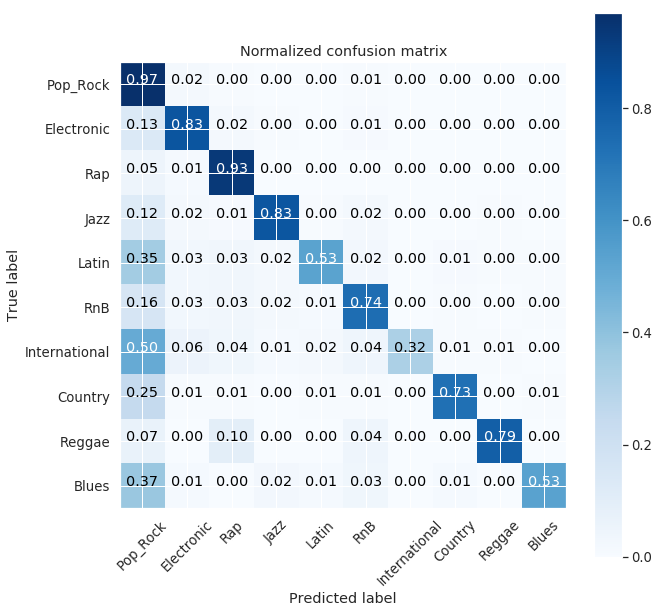

In [21]:
# y_pred = clf.best_estimator_.predict(genre_music)
# print(confusion_matrix(labels_svm, y_pred))
#Confusion matrix ...
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.autoscale(enable=True)
   # plt.tight_layout(pad=1.08)


# Compute confusion matrix
y_pred = clf.best_estimator_.predict(genre_music)
cnf_matrix = confusion_matrix(labels_svm, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ["Pop_Rock","Electronic","Rap","Jazz","Latin","RnB","International","Country","Reggae","Blues"]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## 5. Discussion/Conclusions

We ended up exceeding our stated goal of parity with human levels of accuracy in musical genre classification. Our goal was stated at 60%, while our final result had an accuracy closer to 66%. Through our research we found that SVM offers an efficient and accurate musical genre classification method which lends itself well to imbalanced multiclass datasets. Though the confusion matrix showed that there was a distinct increased probability of being labelled the class which was over-represented in the data, there was still a relatively high level of accuracy among the other labels. The confusion matrix was a powerful tool to assess the effectiveness of our solution as it broke down the accuracy of the model in a more granular manner than the simple accuracy and logloss calculations. Where the accuracy measurement showed a strong penalization for the highly biased data, the logloss measure was far more forgiving of the unbalanced data. It was only with the confusion matrix that we could see and understand the true effect of the imbalance in the data.

In future iterations of projects or research like this, there are a few places that we would have liked to improve. Firstly, further tweaking of the model could be used to decrease the number of false positive results of the first label. As seen in the literature, SVM does offer a very solid foundation, but we believe that tweaking the kernels used and layering in a function to account for over fitting, or developing some kind of moderating function to account for imbalanced data would greatly increase the accuracy of the model. Furthermore, there is room for exploring the labels used in classification, though they represent generally understood musical genres, it is important to consider the changing trends within and between genres over time.



## 6. References

[1] M. Ali and Z. Siddiqui, '"Automatic Music Genres Classification using Machine Learning," International Journal of Advanced Computer Science and Applications, vol. 8, no. 8, 2017, pp. 337-344.<br>
[2] K. Aryafar, J. Sina and A. Shokoufandeh, '"Automatic Musical Genre Classification using Sparsity-Eager Support Vector Machines," Proceedings of the 21st International Conference on Pattern Recognition, 11-15 Nov 2012.<br>
[3] A.J.H. Goulart, R.C. Guido and C.D. Maciel, '"Exploring Different Approaches for Music Genre Classification," Egyptian Informatics Journal, vol. 13, no. 2, July 2012, pp. 59-63.<br>
[4] L. Guo, Z. Gu and T. Liu, '"Music Genre Classification with Machine Learning," Stanford CS 229 Student Report, 2012.<br>
[5] A. Mutiara, R. Refianti and N. Mukarromah, '"Musical Genre Classification Using Support Vector Machines and Audio Features," TELKOMNIKA Indonesian Journal of Electrical Engineering, vol. 14, no. 3, 3, September 2016.<br>
[6] Y. Sazaki and A. Aramaghan, '"Rock Genre Classification using K-Nearest Neighbor," Proceedings of the 1st International Conference on Computer Science and Engineering, 2014.<br>
[7] E. Tamatjita and A. Mahastama, '"Comparison of Music Genre Classification using Nearest Centroid Classified and k-Nearest Neighbours," 2016 International Conference on Information Management and Technology, 16-18 Nov. 2016.<br>
[8] G. Tzanetakis and P. Cook, '"Musical Genre Classification of Audio Signals," IEEE Transactions on Speech and Audio Processing, vol. 10, no. 5, July 2002, pp. 293-302.<br>
[9] C. Xu, N.C. Maddage, X. Shao, F. Cao and Q. Tian, '"Musical Genre Classification Using Support Vector Machines," IEEE International Conference on Acoustics, Speech, and Signal Processing 2003, 6-10 April 2003.